Uvozimo potrebne knjižnice za manipulacijo s podatki:

In [2]:
import random
import math
import matplotlib.pylab as plt

Najprej določimo točke v kvadratu velikosti 1x1. Točke so določena z dvema koordinatama (x,y), kjer x označuje premik po vodoravni stranici, y pa premik po navpični stranici. 

Oglišča kvadrata so (0,0), (0,1), (1,0), (1,1).

In [11]:
def kvadrat_tock(st_tock):
    slovar_tock = {}
    for i in range(st_tock):
        x = random.random()
        y = random.random()
        slovar_tock['tocka_' + str(i)] = (x,y)
    return slovar_tock

tocke = kvadrat_tock(8)
primer_1 = {'tocka_0': (0.1, 0.1), 'tocka_1': (0.2, 0.1),  'tocka_2': (0.1,
0.2),  'tocka_3': (0.2, 0.2)}

primer_2 = {'tocka_0': (0.1, 0.1), 'tocka_1': (0.2, 0.1), 'tocka_2': (0.3, 0.1),  'tocka_3': (0.4, 0.1),
           'tocka_4': (0.5, 0.1), 'tocka_5': (0.6, 0.1), 'tocka_6': (0.7, 0.1),  'tocka_7': (0.8, 0.1),
           'tocka_8': (0.9, 0.1), 'tocka_9': (1, 0.1)}

primer_3 = {'tocka_0': (0, 0), 'tocka_1': (0, 1/3), 'tocka_2': (0, 2/3),  'tocka_3': (0, 1),
           'tocka_4': (1/3, 0), 'tocka_5': (1/3, 1/3), 'tocka_6': (1/3, 2/3),  'tocka_7': (1/3, 1),
           'tocka_8': (2/3, 0), 'tocka_9': (2/3, 1/3), 'tocka_10': (2/3, 2/3),  'tocka_11': (2/3, 1)}

Razdalje med točkami izračunamo s pomočjo Pitagorovega izreka.

In [12]:
def razdalje(slovar):
    slovar_razdalj = {}
    #a^2 + b^2 = c^2
    for key1 in slovar.keys():
        seznam_razdalj = []
        # for key in slovar.keys()
        for key2 in slovar.keys():
            if key1 == key2:
                continue
            delta_x = slovar[key1][0] - slovar[key2][0]
            delta_y = slovar[key1][1] - slovar[key2][1]
            razdalja = sqrt(delta_x^2 + delta_y^2)
            seznam_razdalj.append((key2,razdalja))
        slovar_razdalj[key1] = seznam_razdalj
    return(slovar_razdalj)

#razdalje(tocke)

Posamezna razdalja nam predstavlja preferenco (manjša kot je razdalja, večja je preferenca). Le te uredimo po velikosti, od najmanjše do največje, za vsako točko:

In [13]:
def preference(slovar_razdalj):
    for key in slovar_razdalj.keys():
        sorted_by_second = sorted(slovar_razdalj[key], key=lambda tup: tup[1])
        slovar_razdalj[key] = sorted_by_second
    return(slovar_razdalj)

#preference(razdalje(tocke))

Algoritem je sestavljen iz dveh funkcij:
1) funkcija "Najkrajsa"  pregleda razdalje med točkami. Ko najde najmanjšo razdaljo izmed vseh, izbere tisti dve točki, med katerima ta razdalja nastopi in ju poveže v par. Na koncu nam vrne par točk, s pripadajočo najmanjšo razdaljo.

In [14]:
def Najkrajsa(slovar):
    min_razdalja = sqrt(2)
    par = []
    for key1 in slovar.keys():
        #nastavimo min_razdaljo na najmanjso ki nastopa v slovarju
        if slovar[key1][0][1] <= min_razdalja:
            min_razdalja = slovar[key1][0][1]

    for key2 in slovar.keys():
        if slovar[key2][0][1] == min_razdalja:
            par = [slovar[key2][0][0], key2]
            break

    return(par, min_razdalja)


Najkrajsa(preference(razdalje(tocke)))

(['tocka_5', 'tocka_2'], 0.05524521926449958)

2) funkcija "Vsi_pari" nam omogoči, da se čez 1. funckijo zapeljemo tolikokrat kolikokrat je potrebno in povežemo vse točke v pare. Na koncu nam vrne seznam vseh parov.

In [20]:
def Vsi_pari(slovar):
    pari = []
    for i in range(len(slovar)/2):
        (par, najkrajsa) = Najkrajsa(slovar)
        for e in par:
            # Izbrišemo točki v paru iz slovarja
            if str(e) in slovar:
                del slovar[str(e)]
            # izbrišemo to preferenco še vsem točkam v slovarju
            for elm in slovar.keys():
                #print(elm, slovar[elm])
                for tocka in slovar[elm]:
                    if e in tocka:
                        slovar[elm].remove(tocka)

        pari.append(par)
    return(pari)

#Vsi_pari(preference(razdalje(tocke)))

#Vsi_pari(preference(razdalje(primer_1)))
#Vsi_pari(preference(razdalje(primer_2)))
Vsi_pari(preference(razdalje(primer_3)))


[['tocka_1', 'tocka_0'],
 ['tocka_3', 'tocka_2'],
 ['tocka_5', 'tocka_4'],
 ['tocka_7', 'tocka_6'],
 ['tocka_9', 'tocka_8'],
 ['tocka_11', 'tocka_10']]

S funkcijo "vsota_razdalj" izračunamo seštevek vseh razdalj med točkami, ki so skupaj v paru:

In [16]:
def vsota_razdalj(slovar, pari):
    vsota = 0
    # Pogledamo vse pare v "pari", poiščemo točko ki nastopa v slovarju in vzamemo dolžino iz njenih preferenc do točke, s katero je v paru.
    for e in pari:
        for i in range(len(slovar[e[0]])):
            if slovar[e[0]][i][0] == e[1]:
                vsota += slovar[e[0]][i][1]
    return(vsota)

vsota_razdalj(preference(razdalje(tocke)),Vsi_pari(preference(razdalje(tocke))))

1.001787717585637

Na koncu pa še s pomočjo sledeče funkcije analiziramo, kako se obnaša naša vsota razdalj, ko povečujemo število točk.

{0: 0, 10: 2.7798905216709797, 20: 4.7158080435236895, 30: 7.415282490304487, 40: 10.178585960972525, 50: 11.596665648013058, 60: 14.482242839678026, 70: 19.60558365883667, 80: 19.766974644496674, 90: 24.926572758252302, 100: 26.2640736414589, 110: 27.811047691147206, 120: 28.972210554645994, 130: 31.207560510676824, 140: 36.26955806218589, 150: 42.38042008378515, 160: 40.398345533193734, 170: 44.69978005522902, 180: 46.10119949889802, 190: 49.09997996686528, 200: 49.83976133674277}


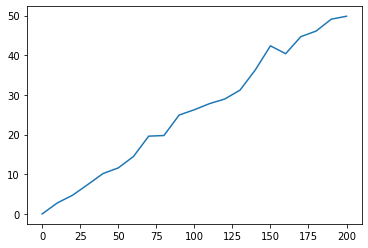

In [9]:
def razlicne_vsote(od, do, korak):
    slovar_vsote={}
    for i in range(od, do + 1, korak):
        slovar_vsote[i]=  vsota_razdalj(preference(razdalje(kvadrat_tock(i))),Vsi_pari(preference(razdalje(kvadrat_tock(i)))))
    return(slovar_vsote)

slovar = razlicne_vsote(0,200,10)
print(slovar)
plt.plot(*zip(*sorted(slovar.items())))
plt.show()